In [3]:
import json
import os
import pandas as pd

path_data = "data/ML-dataset/"

file = json.load(open(path_data + "test-queries.json"))

In [5]:
file[0].keys()

dict_keys(['tokens', 'text', 'label', 'country'])

In [ ]:
def lca_mapping(x_sl, x_tl, y_)

In [16]:
from collections import defaultdict

labs = defaultdict(int)
counts = defaultdict(int)

for dir in file:
    labs[dir["label"]] += 1
    counts[dir["country"]] +=1

labs

defaultdict(int,
            {'32001L0034': 537,
             '32014L0050': 42,
             '32014L0065': 484,
             '32008L0008': 270,
             '32009L0018': 107,
             '32003L0109': 122,
             '32011L0085': 78,
             '32006L0007': 80,
             '32018L0410': 65,
             '31991L0271': 83,
             '32014L0049': 97,
             '32007L0030': 28,
             '32019L0944': 348,
             '32013L0029': 197,
             '32008L0050': 156,
             '32014L0092': 145,
             '32008L0062': 101,
             '32014L0017': 225,
             '32009L0081': 358,
             '32016L2037': 5,
             '32011L0099': 103,
             '32002L0046': 70,
             '32009L0031': 182,
             '32009L0030': 55,
             '32002L0068': 7,
             '32014L0054': 37,
             '31997L0081': 9,
             '32001L0096': 66,
             '32007L0036': 75,
             '32019L1937': 134,
             '31977L0249': 35,
          

In [2]:
df = df[df["jurisdiction"].apply(lambda x: x["label"]) == "Italy"]

# eval similarity based on whether two articles share a common eu provision - upgrade to similar article/paragraphs

relevant_cols = ["title", "summary", "summaryEn", "euCaselaw", "euProvisions", "eurovoc"]
df = df[relevant_cols]
df = df[(df["euProvisions"].str.len() > 0)] #  | (df["eurovoc"].str.len() > 0)
df = df.reset_index(drop = True)
df.head()

,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
0,"Cass. Pen. sez. VI, 28/10/2022, no. 41102","<p><span style=""color: rgb(68, 68, 68);"">In te...",<p>The case is referred to the European arrest...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
1,"Cass. Pen. sez F, 29/08/2023, n. 36397","<p><span style=""color: rgb(0, 0, 0);"">In tema ...",<p>The case concerns the crime of driving with...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
2,"Cass. Pen. sez. fer., 27/08/2020, n. 24593","<p>L'art. 83, comma 12, L. n. 27 del 2020, pur...",<p>The case is referred to the European Arrest...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
3,"Cassazione penale sez. VI, 30/10/2019, n. 49545",<p>L'omessa trasmissione della traduzione in l...,<p>Failure to provide an Italian-language tran...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
4,"Cass. Pen. sez. VI, 15/09/2020, n.30885",<p>Meri vizi formali afferenti la comunicazion...,<p>The case concerns the offences of illigal t...,[],"[{'celex': '32014L0041', 'name': 'Directive 20...",[]


In [3]:
import re

# remove html elements
df["summaryEn"] = df["summaryEn"].apply(lambda x: re.sub(r"<.*?>", "", x))
df["summary"] = df["summary"].apply(lambda x: re.sub(r"<.*?>", "", x))
print(df.shape)
df.head()

(69, 6)


,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
0,"Cass. Pen. sez. VI, 28/10/2022, no. 41102","In tema di mandato di arresto europeo, è onere...",The case is referred to the European arrest wa...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
1,"Cass. Pen. sez F, 29/08/2023, n. 36397","In tema di mandato di arresto europeo, l'udien...",The case concerns the crime of driving without...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
2,"Cass. Pen. sez. fer., 27/08/2020, n. 24593","L'art. 83, comma 12, L. n. 27 del 2020, pur de...",The case is referred to the European Arrest Wa...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
3,"Cassazione penale sez. VI, 30/10/2019, n. 49545",L'omessa trasmissione della traduzione in ling...,Failure to provide an Italian-language transla...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
4,"Cass. Pen. sez. VI, 15/09/2020, n.30885",Meri vizi formali afferenti la comunicazione n...,The case concerns the offences of illigal traf...,[],"[{'celex': '32014L0041', 'name': 'Directive 20...",[]


In [35]:
with open("texts.txt", "w") as f:
    file_content = []

    for title, case in zip(df["title"], df["summaryEn"]):
        file_content += [title + "\n"]
        file_content += [case + "\n"]
        file_content += ["=======================\n"]

    f.writelines(file_content)

In [4]:
from sklearn.utils import shuffle

print(f"Cases that mention Italy/Italian: {len(df[df['summaryEn'].apply(lambda x: 'Ital' in x) == True])}")
print(f"Cases that mention ground(s): {len(df[df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True])}")
print(f"Cases that mention concern(s): {len(df[df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True])}")
print(f"Cases with all: {len(df[(df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True)])}")

df_temp = df[(df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True)]
df_nontemp = df[~((df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True))]

print(df_temp.shape, df_nontemp.shape)

df_nontemp = shuffle(df_nontemp, random_state = 42)

groups_non_temp = [df_nontemp.iloc[idx:idx + len(df_temp)] for idx in range(0,len(df_nontemp), len(df_temp))]

print(df_temp.shape, df_nontemp.shape)

Cases that mention Italy/Italian: 33
Cases that mention ground(s): 20
Cases that mention concern(s): 25
Cases with all: 14
(14, 6) (55, 6)
(14, 6) (55, 6)


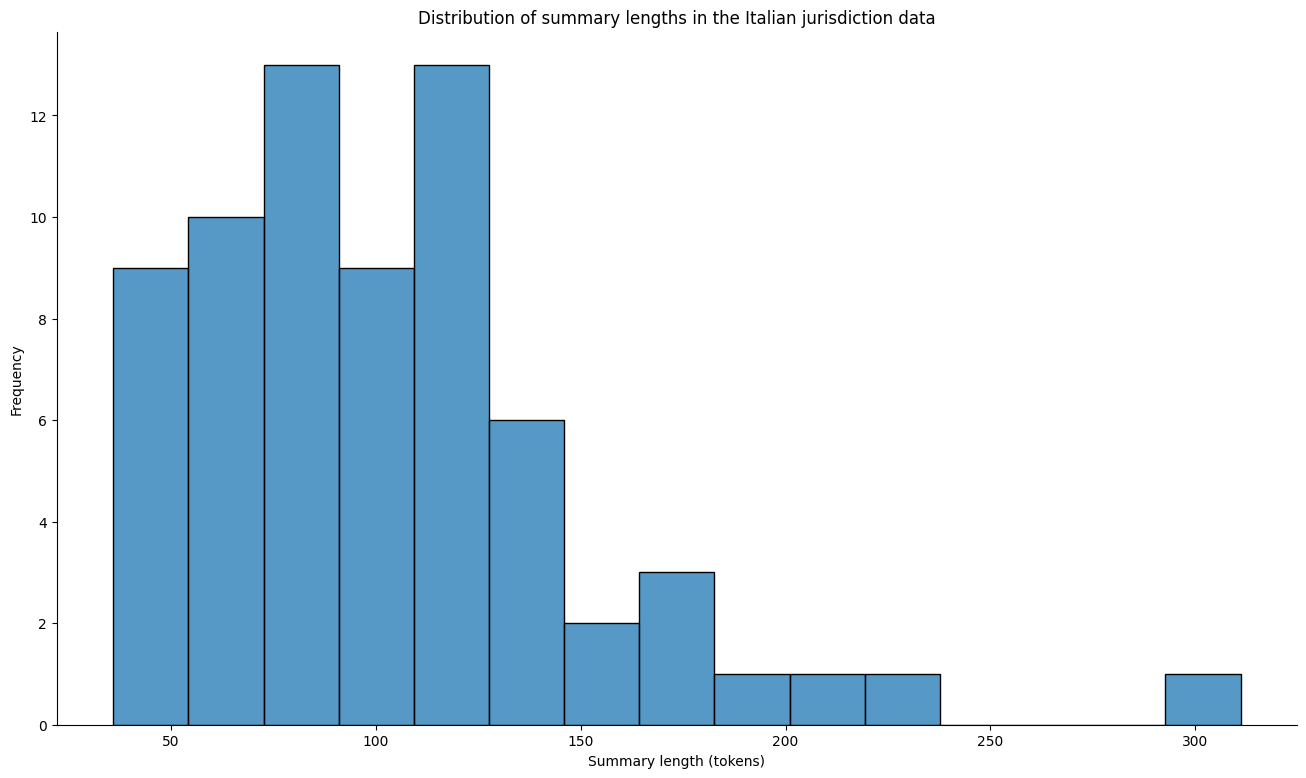

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,9))
sns.histplot(df["summary"].str.split(" ").apply(lambda x: len(x)), bins = 15)
sns.despine()
plt.xlabel("Summary length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of summary lengths in the Italian jurisdiction data")
plt.savefig("summary_length_IT.png", transparent = False)
plt.show()

In [6]:
import numpy as np

data_less150 = df[df["summary"].str.split(" ").apply(lambda x: len(x)) < np.median(df["summary"].str.split(" ").apply(lambda x: len(x)))]
data_more150 = df[df["summary"].str.split(" ").apply(lambda x: len(x)) >= np.median(df["summary"].str.split(" ").apply(lambda x: len(x)))]

print(np.median(df["summary"].str.split(" ").apply(lambda x: len(x))))

96.0


In [7]:
print(data_less150.shape, data_more150.shape)

(34, 6) (35, 6)


In [8]:
import numpy as np
import torch

from sentence_transformers import SentenceTransformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


$P=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs}$

$R=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs\ in\ dataset}$

$MRR=\frac{1}{|Q|}\sum_q^Q \frac{1}{rank_q}$ where

$MRR^*=\frac{1}{|Q|}\sum_q^Q \frac{1}{rank_q + missed}$ where

$rank_q = 0$ if there are no relevant documents in the retrieved search window\
where $missed$ is the number of relevant documents missed in the retrieved search window equal to at most the number non-relevant retrieved documents

$DCG=\sum_{i=1}^p\frac{rel_i}{log_2(i+1)}$


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# at least one shared EU provision ==> similar
# at least one shared EuroVoc ==> similar
# eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

def cosine_search(query, search, query_type, top_k = 5):
    cosine_scores = cosine_similarity(query, search)
    score_doc = []

    denesting_label = ""
    if query_type == "euProvisions":
        denesting_label = "celex"
    elif query_type == "eurovoc":
        denesting_label = "label"

    running_mrr = 0
    running_mrr_normal = 0
    metrics = {}

    for i in range(cosine_scores.shape[0]):
        all_matches = np.argsort(cosine_scores[i])[::-1]
        best_matches = all_matches[1:top_k+1]
        query_celex = df.iloc[i][query_type][0][denesting_label]

        # see which top_k retrieved documents were retrieved
        score = []
        for retrieved_case in best_matches:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            score.append(int(query_celex in retrieved_celex))

        ### find all relevant cases that were missed
        missed_matches = []
        # for retrieved_case in all_matches[1:len(df_temp)]:
        for retrieved_case in all_matches[1:]:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            missed_matches.append(int(query_celex in retrieved_celex))

        score = np.asarray(score)
        no_missed_matches = np.sum(missed_matches) if np.sum(missed_matches) > 0 else 1
        score_doc.append([np.sum(score)/top_k, np.sum(score)/no_missed_matches])
        rank = np.where(score != 0)[0] # get first non-zero rank
        rank = (rank[0] + 1) if len(rank) > 0 else 0
        missed = np.min([len(np.where(score == 0)[0]), np.sum(missed_matches)])
        running_mrr += 1/(rank + missed) if rank != 0 else 0 # rank starts at 0 bcs. of this so rank + 1
        running_mrr_normal += 1/(rank) if rank != 0 else 0 # rank starts at 0 bcs. of this so rank + 1
        print(f"Query score: {score}, rank of 1st relevant case: {rank}, mrr_w_penalty: {running_mrr:0.3f}, mrr: {running_mrr_normal:0.3f}, number of cases still missing in the query {missed}, total missed: {np.sum(missed_matches)}")
        
    # macro precision@k and recall@k
    precision, recall = np.mean(score_doc, 0)
    f1 = 2 * precision * recall / (precision + recall)

    metrics["precision"] = precision
    metrics["recall"] = recall
    metrics["f1"] = f1
    metrics["mrr_miss"] = running_mrr/cosine_scores.shape[0]
    metrics["mrr"] = running_mrr_normal/cosine_scores.shape[0]
    
    return metrics

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 57.779, mrr: 62.833, number of cases still missing in the query 0, total missed: 10

Query score: [1 0 0 0 0], rank of 1st relevant case: 1, mrr_w_penalty: 58.029, mrr: 63.833, number of cases still missing in the query 3, total missed: 3

In [10]:
# optimal_top_k = 25 (debatable) 

from collections import defaultdict
from functools import partial
from tqdm import tqdm

models = ["distiluse-base-multilingual-cased-v2", "paraphrase-multilingual-mpnet-base-v2"]
# search_functions = [partial(cosine_search, query_type = "euProvisions"), partial(cosine_search, query_type = "eurovoc"), cosine_search_both]
search_functions = [partial(cosine_search, query_type = "euProvisions")]

scores_search_function = defaultdict()

sl, tl = "EN", "IT"

d = df

for search_func in tqdm(search_functions):
    scores = {"Model": [], "Pair": [], "Value": [], "Score": []}

    for model_name in models:
        model = SentenceTransformer("models/" + model_name).to(device)

        data_pairs = [
            (f"{sl}-{sl}", np.asarray(d["summaryEn"].apply(model.encode).tolist()), np.asarray(d["summaryEn"].apply(model.encode).tolist())),
            (f"{tl}-{tl}", np.asarray(d["summary"].apply(model.encode).tolist()), np.asarray(d["summary"].apply(model.encode).tolist())),
            (f"{sl}-{tl}", np.asarray(d["summaryEn"].apply(model.encode).tolist()), np.asarray(d["summary"].apply(model.encode).tolist())),
            (f"{tl}-{sl}", np.asarray(d["summary"].apply(model.encode).tolist()), np.asarray(d["summaryEn"].apply(model.encode).tolist()))
        ]

        for (pair, query, search) in data_pairs:
            metrics = search_func(query = query, search = search, top_k = 5)

            scores["Model"] += [model_name] * len(list(metrics.keys()))
            scores["Pair"] += [pair] * len(list(metrics.keys()))
            scores["Value"] += list(metrics.values())
            scores["Score"] += list(metrics.keys())

    name = ""
    if type(search_func) == partial:
        name = search_func.func.__name__ + "_" + "_".join(list(search_func.keywords.values()))
    else:
        name = search_func.__name__
    scores_search_function[name] = scores


  0%|          | 0/1 [00:00<?, ?it/s]

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 1.000, mrr: 1.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 2.000, mrr: 2.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 3.000, mrr: 3.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 4.000, mrr: 4.000, number of cases still missing in the query 0, total missed: 53
Query score: [0 1 0 1 1], rank of 1st relevant case: 2, mrr_w_penalty: 4.250, mrr: 4.500, number of cases still missing in the query 2, total missed: 10
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 5.250, mrr: 5.500, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 0 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 5.750, mrr:

100%|██████████| 1/1 [00:15<00:00, 15.68s/it]

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 1.000, mrr: 1.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 2.000, mrr: 2.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 3.000, mrr: 3.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 4.000, mrr: 4.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 0 0], rank of 1st relevant case: 1, mrr_w_penalty: 4.333, mrr: 5.000, number of cases still missing in the query 2, total missed: 11
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 5.333, mrr: 6.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 6.333, mrr:

<Figure size 1600x900 with 0 Axes>

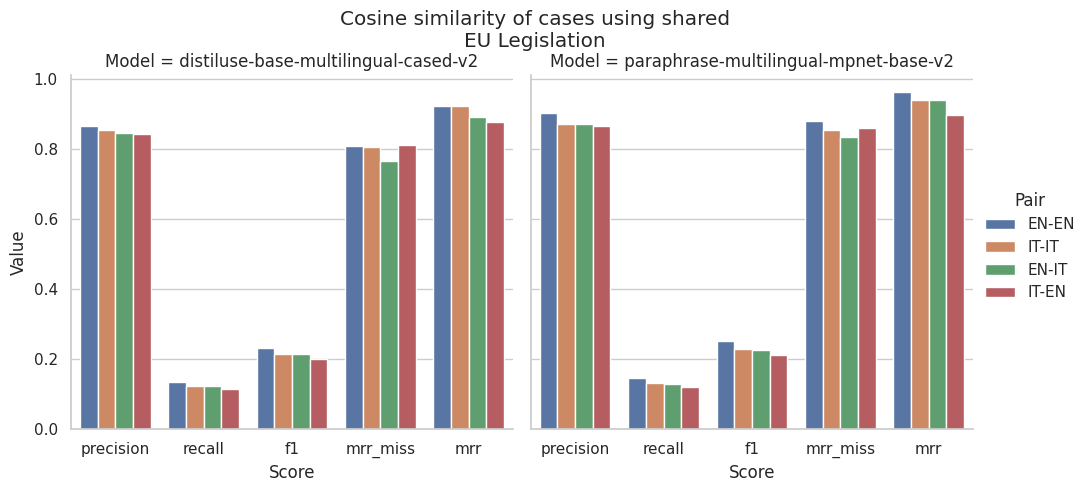

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

figure_title_names = {
    "cosine_search_euProvisions": "Cosine similarity of cases using shared\nEU Legislation",
    "cosine_search_eurovoc": "Cosine similarity of cases using shared\nEuroVoc Labels",
    "cosine_search_both": "Cosine similarity of cases using both shared\nEU Legislation and EuroVoc Labels"
}

plt.figure(figsize = (16,9))
sns.set_theme(style = "whitegrid")
for func_name, score_func in scores_search_function.items():
    scores_df = pd.DataFrame(score_func)
    # scores_df = scores_df[scores_df["Model"] == "paraphrase-multilingual-mpnet-base-v2"]

    fig = sns.catplot(kind = "bar", data = scores_df, x = "Score", y = "Value", hue = "Pair", col = "Model")
    fig.figure.subplots_adjust(top=0.85)
    fig.figure.suptitle(figure_title_names[func_name])
    
    plt.savefig(f"{func_name}.png", transparent = False)
    plt.show()

In [12]:
# import numpy as np

# from sklearn.metrics.pairwise import cosine_similarity

# # at least one shared EU provision ==> similar
# # at least one shared EuroVoc ==> similar
# # eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

# def cosine_search_both(query, search, top_k):
#     cosine_scores = cosine_similarity(query, search)
#     score_doc = []

#     for i in range(cosine_scores.shape[0]):
#         all_matches = np.argsort(cosine_scores[i])[::-1]
#         best_matches = all_matches[1:top_k+1]

#         query_celex = df.iloc[i]["euProvisions"][0]["celex"]
#         query_eurovec = df.iloc[i]["eurovoc"][0]["label"]

#         # see which top_k retrieved documents were retrieved
#         score = []
#         for retrieved_case in best_matches:
#             retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
#             retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
#             score.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))

#         ### find all relevant cases that were missed
#         missed_matches = []
#         for retrieved_case in all_matches[1:]:
#             retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
#             retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
#             missed_matches.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))
        
#         no_missed_matches = np.sum(missed_matches) if np.sum(missed_matches) > 0 else 1
#         score_doc.append([np.sum(score)/top_k, np.sum(score)/no_missed_matches])
        
#     # macro precision and recall
#     precision, recall = np.mean(score_doc, 0)
#     f1 = 2 * precision * recall / (precision + recall)

#     return precision, recall, f1

Further refinement: check the retrieved documents, and if they are not relevant continue searching until a relevant case is found, up until top_k documents have been found

In [13]:
# arr_sc = []
# mean_sc = []
# for sc in s:
#     arr_sc.append(sc["cosine_search_euProvisions"]["Value"])


# arr_sc = np.asarray(arr_sc)
# for idx in range(arr_sc.shape[1]):
#     mean_sc.append(np.mean(arr_sc[:, idx]))

# scores = {"Model": [], "Pair": [], "Value": [], "Score": []}
# mean_sc
# sc_new = {"Model": s[0]["cosine_search_euProvisions"]["Model"], "Pair": s[0]["cosine_search_euProvisions"]["Pair"], "Value": mean_sc, "Score": s[0]["cosine_search_euProvisions"]["Score"]}
# # sc_new = {"func_name": {"cosine_search_euProvisions": sc_new}}

# sc_new

In [14]:
# # optimal_top_k = 25 (debatable) 

# from collections import defaultdict
# from functools import partial
# from tqdm import tqdm

# models = ["distiluse-base-multilingual-cased-v2", "paraphrase-multilingual-mpnet-base-v2"]
# # search_functions = [partial(cosine_search, query_type = "euProvisions"), partial(cosine_search, query_type = "eurovoc"), cosine_search_both]
# search_functions = [partial(cosine_search, query_type = "euProvisions")]

# used_data = "non_temp"
# metrics = ["Precision", "Recall", "F1", "MRR"]

# sl, tl = "EN", "IT"

# s = []

# for group in groups_non_temp:
#     scores_search_function = defaultdict()
#     for search_func in tqdm(search_functions):
#         scores = {"Model": [], "Pair": [], "Value": [], "Score": []}

#         for model_name in models:
#             model = SentenceTransformer("models/" + model_name).to(device)

#             data_pairs = [
#                 (f"{sl}-{sl}", np.asarray(group["summaryEn"].apply(model.encode).tolist()), np.asarray(group["summaryEn"].apply(model.encode).tolist())),
#                 (f"{tl}-{tl}", np.asarray(group["summary"].apply(model.encode).tolist()), np.asarray(group["summary"].apply(model.encode).tolist())),
#                 (f"{sl}-{tl}", np.asarray(group["summaryEn"].apply(model.encode).tolist()), np.asarray(group["summary"].apply(model.encode).tolist())),
#                 (f"{tl}-{sl}", np.asarray(group["summary"].apply(model.encode).tolist()), np.asarray(group["summaryEn"].apply(model.encode).tolist()))
#             ]

#             for (pair, query, search) in data_pairs:
#                 precision, recall, f1, mrr = search_func(query = query, search = search, top_k = 5)

#                 scores["Model"] += [model_name] * len(metrics)
#                 scores["Pair"] += [pair] * len(metrics)
#                 scores["Value"] += [precision, recall, f1]
#                 scores["Score"] += [metrics]

#         name = ""
#         if type(search_func) == partial:
#             name = search_func.func.__name__ + "_" + "_".join(list(search_func.keywords.values()))
#         else:
#             name = search_func.__name__
#         scores_search_function[name] = scores

#     s.append(scores_search_function)


In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# figure_title_names = {
#     "cosine_search_euProvisions": "Cosine similarity of cases using shared\nEU Legislation",
#     "cosine_search_eurovoc": "Cosine similarity of cases using shared\nEuroVoc Labels",
#     "cosine_search_both": "Cosine similarity of cases using both shared\nEU Legislation and EuroVoc Labels"
# }

# plt.figure(figsize = (16,9))
# sns.set_theme(style = "whitegrid")
# scores_df = pd.DataFrame(sc_new)
# print(scores_df)
# # scores_df = scores_df[scores_df["Model"] == "paraphrase-multilingual-mpnet-base-v2"]

# fig = sns.catplot(kind = "bar", data = scores_df, x = "Score", y = "Value", hue = "Pair", col = "Model")
# fig.figure.subplots_adjust(top=0.85)
# fig.figure.suptitle("cosine_search_euProvisions")

# plt.savefig(f"cosine_search_euProvisions_{used_data}.png", transparent = False)
# plt.show()